<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Find-weights" data-toc-modified-id="Find-weights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Find weights</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# https://towardsdatascience.com/when-and-how-to-use-weighted-least-squares-wls-models-a68808b1a89d

# Data

In [4]:
np.random.seed(24)
x = np.random.uniform(-5, 5, 25)
e = 2 * np.random.randn(25)
y = 2 * x + e

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


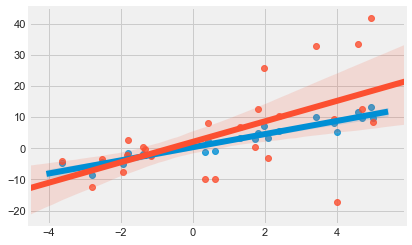

In [5]:
# alternate error as a function of x
e2 = e * (x + 5)
y2 = 2 * x + e2

sns.regplot(x, y)
sns.regplot(x, y2)
# wider error plot is hetero

In [6]:
# add a strong outlier for high x
x_high = np.append(x,5)
y_high = np.append(y2,160)

# add a strong outlier for low x
x_low = np.append(x,-4)
y_low = np.append(y2,160)

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


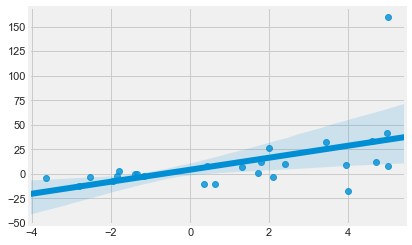

In [8]:
sns.regplot(x_high,y_high);

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


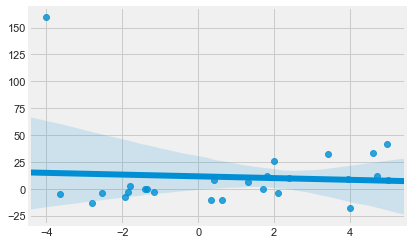

In [10]:
sns.regplot(x_low,y_low); 

# Find weights

In [11]:
# NOTE: we had e2 = e * (x + 5)

In [12]:
# calculate weights for sets with low and high outlier
sample_weights_low = [1/(x+5) for x in x_low]
sample_weights_high = [1/(x+5) for x in x_high]

In [14]:
# reshape for compatibility
X_low = x_low.reshape(-1, 1)
X_high = x_high.reshape(-1, 1)

ymod = y_low
# import and fit an OLS model, check coefficients
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_low, ymod)

# fit WLS using sample_weights
WLS = LinearRegression()
WLS.fit(X_low, ymod, sample_weight=sample_weights_low)
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)

11.928279162202099 [-0.80996264]
WLS
17.49178858287187 [-7.72446701]


In [15]:
model = LinearRegression()
model.fit(X_high, ymod)
WLS.fit(X_high, ymod, sample_weight=sample_weights_high)
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)

4.240948049524315 [6.1138495]
WLS
5.673823120611783 [4.86870293]
